In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager

#print(font_manager.findSystemFonts(fontext='ttf'))

font_dir = '/Users/floraths/Library/Fonts'

fonts = os.listdir(font_dir)

for font in fonts:
    if font.endswith('.ttf'):
        font_manager.fontManager.addfont(f'{font_dir}/{font}')

In [ ]:
from pyu

In [ ]:
plt.rcParams.update(sy)

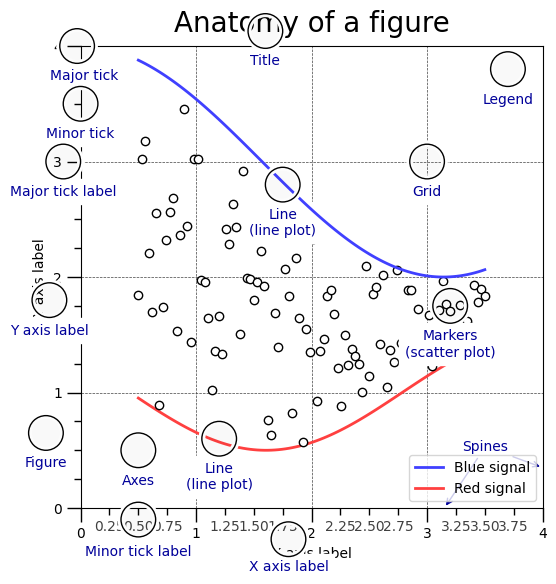

In [7]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(123)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3 + np.cos(X)
Y2 = 1 + np.cos(1 + X / 0.75) / 2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x


ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which="major", width=1.0)
ax.tick_params(which="major", length=10)
ax.tick_params(which="minor", width=1.0, labelsize=10)
ax.tick_params(which="minor", length=5, labelsize=10, labelcolor="0.25")

ax.grid(linestyle="--", linewidth=0.5, color=".25", zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0, marker="o", markerfacecolor="w", markeredgecolor="k")

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment="bottom")
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke

    circle = Circle(
        (x, y),
        radius,
        clip_on=False,
        zorder=10,
        linewidth=1,
        edgecolor="black",
        facecolor=(0, 0, 0, 0.0125),
        path_effects=[withStroke(linewidth=5, foreground="w")],
    )
    ax.add_artist(circle)

def text(x, y, text):
    ax.text(
        x,
        y,
        text,
        backgroundcolor="white",
        # fontname="Yanone Kaffeesatz", fontsize="large",
        ha="center",
        va="top",
        weight="regular",
        color="#000099",
    )

def add_annotated_circles():
    # Minor tick
    circle(0.50, -0.10)
    text(0.50, -0.32, "Minor tick label")

    # Major tick
    circle(-0.03, 4.00)
    text(0.03, 3.80, "Major tick")

    # Minor tick
    circle(0.00, 3.50)
    text(0.00, 3.30, "Minor tick")

    # Major tick label
    circle(-0.15, 3.00)
    text(-0.15, 2.80, "Major tick label")

    # X Label
    circle(1.80, -0.27)
    text(1.80, -0.45, "X axis label")

    # Y Label
    circle(-0.27, 1.80)
    text(-0.27, 1.6, "Y axis label")

    # Title
    circle(1.60, 4.13)
    text(1.60, 3.93, "Title")

    # Blue plot
    circle(1.75, 2.80)
    text(1.75, 2.60, "Line\n(line plot)")

    # Red plot
    circle(1.20, 0.60)
    text(1.20, 0.40, "Line\n(line plot)")

    # Scatter plot
    circle(3.20, 1.75)
    text(3.20, 1.55, "Markers\n(scatter plot)")

    # Grid
    circle(3.00, 3.00)
    text(3.00, 2.80, "Grid")

    # Legend
    circle(3.70, 3.80)
    text(3.70, 3.60, "Legend")

    # Axes
    circle(0.5, 0.5)
    text(0.5, 0.3, "Axes")

    # Figure
    circle(-0.3, 0.65)
    text(-0.3, 0.45, "Figure")


add_annotated_circles()

color = "#000099"
ax.annotate(
    "Spines",
    xy=(4.0, 0.35),
    xytext=(3.3, 0.5),
    color=color,
    weight="regular",  # fontsize="large", fontname="Yanone Kaffeesatz",
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color=color),
)

ax.annotate(
    "",
    xy=(3.15, 0.0),
    xytext=(3.45, 0.45),
    color=color,
    weight="regular",  # fontsize="large", fontname="Yanone Kaffeesatz",
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color=color),
)

#plt.savefig("../../figures/anatomy/anatomy.pdf")
plt.show()


## bold tick labels

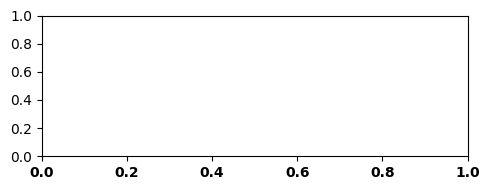

In [3]:
fig, ax = plt.subplots(figsize=(5, 2))

for label in ax.get_xaxis().get_ticklabels():
    label.set_fontweight("bold")

plt.tight_layout()
#plt.savefig("../../figures/anatomy/bold-ticklabel.pdf")
plt.show()


findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.


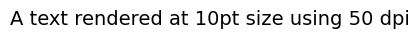

findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.


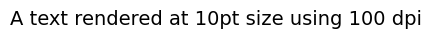

findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.


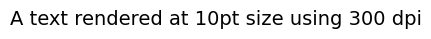

findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.


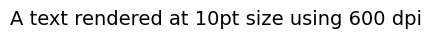

In [4]:
def figure(dpi):
    fig = plt.figure(figsize=(4.25, 0.2))
    ax = plt.subplot(1, 1, 1, frameon=False)
    plt.xticks([]), plt.yticks([])
    text = "A text rendered at 10pt size using {0} dpi".format(dpi)
    ax.text(
        0.5,
        0.5,
        text,
        fontname="Lato",
        ha="center",
        va="center",
        fontsize=14,
        fontweight="regular",
    )
    #plt.savefig("/Users/floraths/Code/scientific-visualization-book/figs/figure-dpi-{0:03d}.png".format(dpi), dpi=dpi)


figure(50)
figure(100)
figure(300)
figure(600)